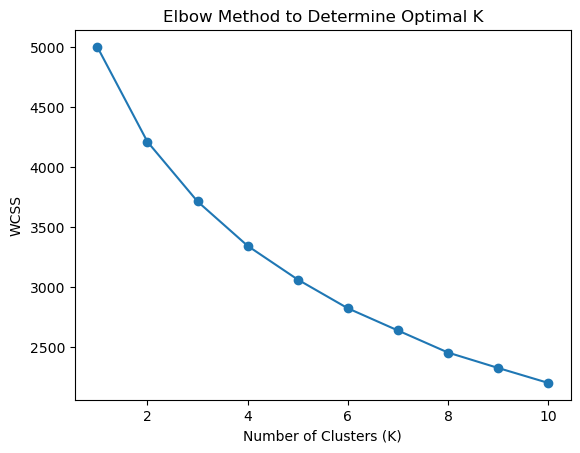

Predicted Future Accident Hotspot: [-0.50320457 -0.07304924]


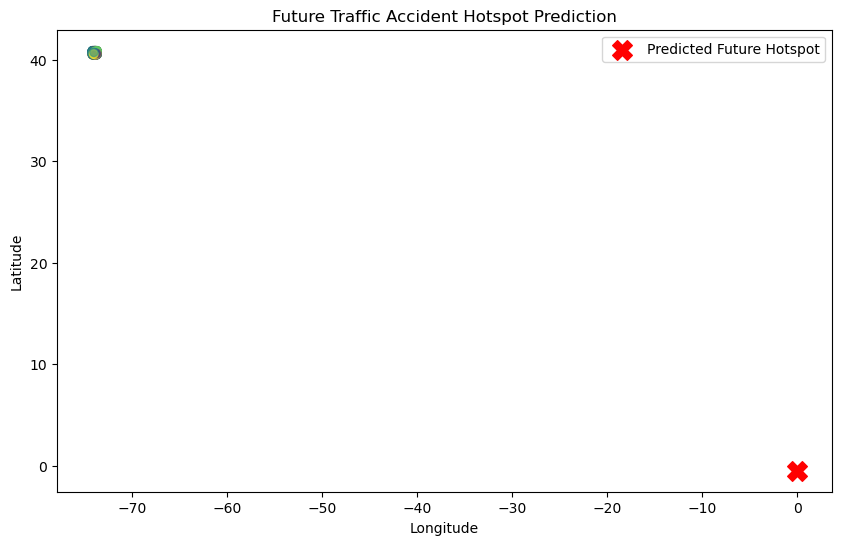

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("traffic_hotspot_prediction.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time']).dt.hour  # Extract hour from time
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month  # Extract month

# Select features for clustering
X = df[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal K using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Choose optimal K (e.g., K=5 based on Elbow Method)
optimal_k = 5  # Change based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Predict future accident hotspot (Example: Next Friday at 5 PM in March)
future_data = np.array([[40.7, -74.0, 17, 4, 3]])  # Latitude, Longitude, Hour=17 (5 PM), Friday=4, March=3
future_data_scaled = scaler.transform(future_data)

predicted_cluster = kmeans.predict(future_data_scaled)
hotspot_location = kmeans.cluster_centers_[predicted_cluster][0][:2]  # Get latitude, longitude of hotspot

print(f"Predicted Future Accident Hotspot: {hotspot_location}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(hotspot_location[1], hotspot_location[0], c='red', marker='X', s=200, label='Predicted Future Hotspot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Future Traffic Accident Hotspot Prediction')
plt.legend()
plt.show()


In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarnings
warnings.filterwarnings("ignore")  # Ignore all warnings
